#EDA on the Galaxy10 dataset

In [1]:
#downloading the astroNN package
!pip install astroNN

     |████████████████████████████████| 9.3MB 5.6MB/s 
     |████████████████████████████████| 6.5MB 47.2MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 3.2MB 48.1MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-cp37-none-any.whl size=9284594 sha256=2031ade3b5107443414ad8f1c009e40270954fa9ef869c44a6ad17ff6a2c2ffe
  Stored in directory: /root/.cache/pip/wheels/22/48/89/bcbab7475e4bff84e86a914145ea3ba907b6afb63f9fbe04b0
  Created wheel for astroquery: filename=astroquery-0.4.1-cp37-none-any.whl size=3831874 sha256=ca0fdfe6441fa63fcb44f69cfc645434037bbaa6602daeaa4a61ba635ef217a7
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroNN astroquery


In [ ]:
#importing required libraries
import pylab as plt
import numpy as np
import pandas as pd
import PIL
import cv2
import plotly as py

from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from astroNN.datasets import galaxy10

In [3]:
#loading images and labels from dataset into notebook
images, labels = galaxy10.load_data()

Galaxy10.h5:  98%|█████████▊| 206M/210M [00:07<00:00, 46.4MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:07, 26.7MB/s]                           


In [4]:
type(images)

numpy.ndarray

In [5]:
type(labels)

numpy.ndarray

In [6]:
#shape of the images array
images.shape

(21785, 69, 69, 3)

In [7]:
#shape of the labels array
labels.shape

(21785,)

There are total 21785 images and their corresponding labels. Images are of 69, 69, 3 dimension.

#EDA of images

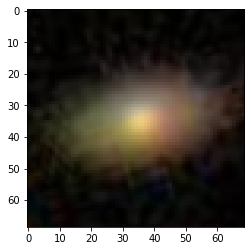

In [8]:
#Plotting a random image from the dataset
plt.imshow(images[1515],cmap='binary')
plt.show()

In [9]:
#displaying the size of an image
###
##NOTE: All images in the dataset are of the same size
#seen in the loop in the next cell
###
print(images[1000].size)

14283


In [58]:
#displaing size of all the images in the dataset
for im in images:
  print(im.size)
#the output has been removed because it was long

Streaming output truncated to the last 5000 lines.
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
14283
1

In [11]:
#displaying the height, width and channel of an image
h, w, c = images[1000].shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

width:   69
height:  69
channel: 3


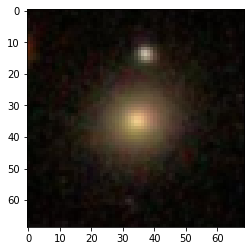

In [12]:
#displaying an image in RGB 
plt.imshow(images[1000],cmap='binary')
plt.show()

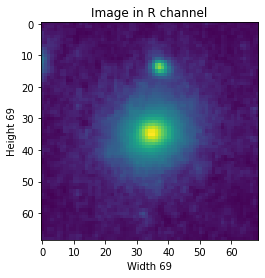

In [13]:
#displaying image in R channel
plt.title('Image in R channel')
plt.ylabel('Height {}'.format(images[1000].shape[0]))
plt.xlabel('Width {}'.format(images[1000].shape[1]))
plt.imshow(images[1000][ : , : , 0])
plt.show()

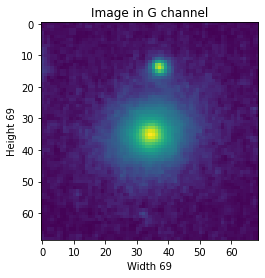

In [14]:
#displaying image in G channel
plt.title('Image in G channel')
plt.ylabel('Height {}'.format(images[1000].shape[0]))
plt.xlabel('Width {}'.format(images[1000].shape[1]))
plt.imshow(images[1000][ : , : , 1])
plt.show()

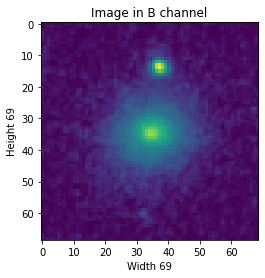

In [15]:
#displaying image in B channel
plt.title('Image in B channel')
plt.ylabel('Height {}'.format(images[1000].shape[0]))
plt.xlabel('Width {}'.format(images[1000].shape[1]))
plt.imshow(images[1000][ : , : , 2])
plt.show()

Viewing the image in all three channels separatly shows different features that can be accentuated if the contrast is fixed.

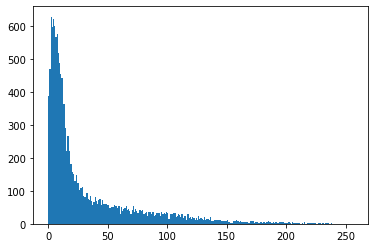

In [16]:
#RGB distribution of an image from the dataset
plt.hist(images[1515].ravel(),256,[0,256]); plt.show()

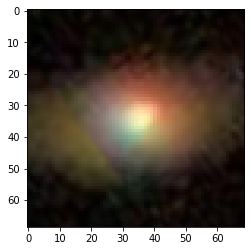

In [17]:
#Plotting the very last image from the dataset
plt.imshow(images[21784],cmap='binary')
plt.show()

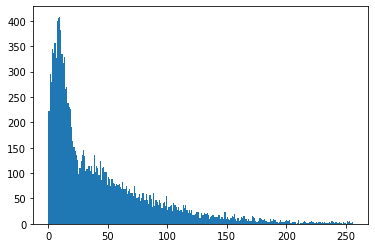

In [18]:
#RGB distribution of the very last image from the dataset
plt.hist(images[21784].ravel(),256,[0,256]); plt.show()

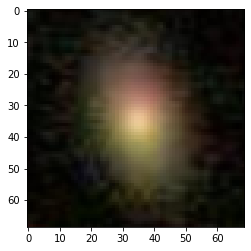

In [19]:
#Plotting the very first image from the dataset
plt.imshow(images[0],cmap='binary')
plt.show()

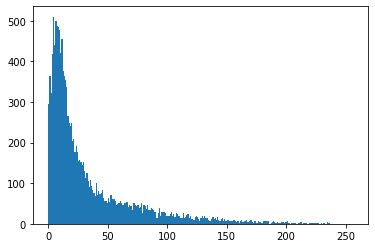

In [20]:
#RGB distribution of the very last image from the dataset
plt.hist(images[0].ravel(),256,[0,256]); plt.show()

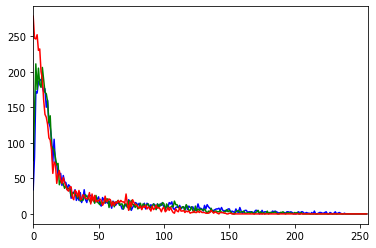

In [21]:
#BGR distribution of an image from the dataset
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([images[1515]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

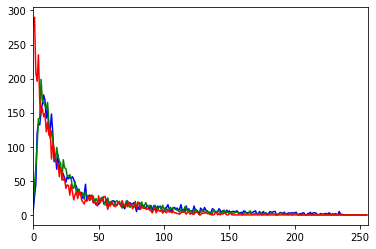

In [22]:
#BGR distribution of the very first image from the dataset
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([images[0]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

AS seen from the graphs above, both the RGB and BGR, distributions remains largely same for all the images in the dataset, with minor fluctuations that are negligible.

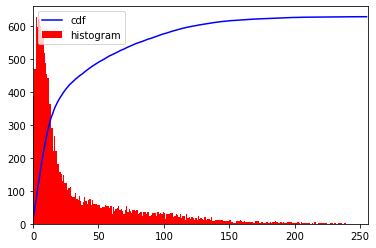

In [23]:
#plotting the contrast
hist,bins = np.histogram(images[1515].flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(images[1515].flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

A good quality image should have the histogram spread out. Here we see that the histogram lies in the dark region. Bad contrast is a given in this type of dataset as most light is diffused and reflected.

Getting this information is important as it will be used in data pre-processing for Histogram Equalization. Histogram Equalization will generate images with good contrast.

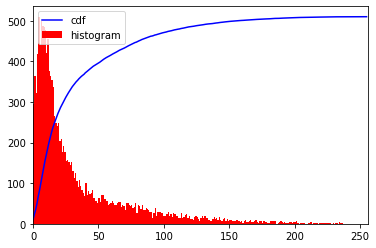

In [24]:
#plotting the contrast of the very first image
hist,bins = np.histogram(images[0].flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(images[0].flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

We see the same trend again, there is minimal change in the contrast of images.

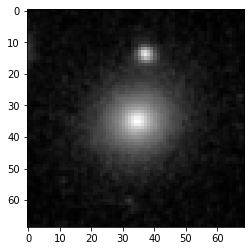

In [25]:
#displaying the image in grayscale
image1 = cv2.cvtColor(images[1000], cv2.COLOR_RGB2GRAY)
plt.imshow(image1, cmap='gray')

In [26]:
for im in images:
  print(type(im))
  print(im.shape)
  print(type(im.shape))

Streaming output truncated to the last 5000 lines.
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<class 'tuple'>
<class 'numpy.ndarray'>
(69, 69, 3)
<

All the images have same dimension, which is (69, 69, 3)

#EDA of labels

In [4]:
df = pd.DataFrame(data=labels, columns=['Galaxy_type'])

In [5]:
df.head(10)

,Galaxy_type
0,2
1,2
2,4
3,2
4,4
5,1
6,1
7,1
8,1
9,7


In [29]:
df.shape

(21785, 1)

In [30]:
df['Galaxy_type'].value_counts()

1    6997
2    6292
0    3461
4    1534
7    1121
8     906
6     589
9     519
3     349
5      17
Name: Galaxy_type, dtype: int64

In [31]:
#getting distribution of galaxy labels
import plotly.express as px
fig = px.histogram(df, x="Galaxy_type")
fig.show()

In [7]:
df['Count'] = df['Galaxy_type'].value_counts()
df.groupby(by='Galaxy_type')
df.drop(['Galaxy_type'], axis=1)
df['Galaxy_type'] = df.index

In [8]:
galaxy_df = df[:10]

In [9]:
galaxy_df

,Galaxy_type,Count
0,0,3461.0
1,1,6997.0
2,2,6292.0
3,3,349.0
4,4,1534.0
5,5,17.0
6,6,589.0
7,7,1121.0
8,8,906.0
9,9,519.0


In [50]:
#scatter plot of galaxy types by thier count
fig = px.scatter(galaxy_df, x='Galaxy_type', y='Count', color="Count",
                 size='Count')
fig.show()

In [44]:
#plotting data disribution of all galaxy types
fig = px.line(galaxy_df, x='Galaxy_type', y='Count')
fig.show()